# Estimering og konfidensintervaller for normalfordelingen

## Læringsmål: Bruke observasjoner fra et tilfeldig utvalg til å estimere forventningsverdien $\mu$ og finne et konfidensintervall for $\mu$

### Delmål
1. Begrep: 'Tilfeldig utvalg'
2. Estimator og tall-estimat for forventningsverdien $\mu$ i normalfordelingen
3. Konfidensintervall for forventningsverdien $\mu$ i normalfordelingen når standardavviket $\sigma$ er kjent
4. Konfidensintervall for forventningsverdien $\mu$ i normalfordelingen når standardavviket $\sigma$ er ukjent ($t$-fordeling)
5. Utvalgstørrelse og usikkerhet (bredde på intervallet)

## Tilfeldige utvalg

#### Eksempel 1: Myntkast
Tenk deg at du skal kaste en mynt $n$ ganger. La en suksess være "kron", mens det motsatte - fiasko - er "mynt". La de stokastiske variablene $X_1$, $X_2$, ..., $X_n$ representere utfallet av kast nr 1, 2, osv. Det vil si at $X_i$ tar tallverdien $1$ dersom du får "kron" i kast nr $i$, og tallverdien $0$ dersom du får "mynt". Siden vi kan anta at kastene er uavhengige, og sannsynligheten for suksess ("kron") er den samme i hvert kast, så sier vi at $X_1$, $X_2$, ..., $X_n$ er et tilfeldig utvalg. 

#### Eksempel 2: Målinger med usikkerhet
Tenk deg at du skal bruke en GPS-enhet for å måle avstanden fra hybelen din til matbutikken (langs fortauet). Den faktiske avstanden er en ukjent størrelse som vi kan kalle $\mu$ (i meter). Når du går fra hybelen til matbutikken med GPS-enheten på er det flere ting som fører til usikkerhet i målingen som gjøres; det kan være usikkerhet i GPS-enheten, værforhold, men også du som går medfører usikkerhet dersom du f.eks må svinge rundt en hindring i veien. Denne usikkerheten representerer vi ved standardavviket $\sigma$ (meter). I dette tilfellet vil det være rimelig å tro at vi ikke kjenner til tallverdien for $\sigma$. La $X_1$, $X_2$, ..., $X_n$ representere målt avstand (i meter) på $n$ fremtidige turer fra hybel til butikk. Vi kan anta at avstanden som måles på en tur er en normalfordelt størrelse med forventning $\mu$ og standardavvik $\sigma$, altså $X_i \sim N(\mu, \sigma)$. Dersom målingene også kan antas å være uavhengige, sier vi at $X_1$, $X_2$, ..., $X_n$ er et tilfeldig utvalg. 

In [1]:
from scipy import stats # statistikk-modulen i scipy-pakken
import matplotlib.pyplot as plt # plotting
import numpy as np

## Estimere forventningsverdi i normalfordelingen 

I koden under simulerer vi observasjoner av $n=10$ uavhengige standard normalfordelte variabler ($\mu = 0$ og $\sigma = 1$). For å estimere forventningsverdien til et slikt tilfeldig utvalg $X_1$, $X_2$, ..., $X_{10}$ regner vi ut gjennomsnittet av de ti observasjonene $x_1$, $x_2$, ..., $x_{10}$. Kjør koden flere ganger for å se hvordan gjennomsnittet endrer seg for hvert sett med observasjoner, og se på hvordan observasjonene fordeler seg langs tallinja!

In [2]:
# Setter parameterverdier og utvalgstørrelse

mu = 0   # NB: vi later som om denne størrelsen er ukjent for oss!
sigma = 1
n = 10

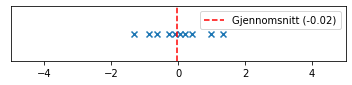

In [3]:
observasjoner = np.random.normal(mu, sigma, n)
mean_value = np.mean(observasjoner)
plt.figure(figsize=(6,1))
plt.scatter(x = observasjoner, y = np.zeros(n), marker='x')
plt.yticks([])
plt.xlim([-5, 5])
plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Gjennomsnitt ({mean_value:.2f})')
plt.legend()
plt.show()

Ved å kjøre koden over flere ganger så vi at gjennomsnittet av de ti observasjonene sjelden treffer akkurat på forventningsverdien $\mu = 0$. Dette er fordi utvalget består av ti *stokastiske* variabler, og dermed vil gjennomsnittet over utvalget $\bar{X} = \tfrac{1}{10}\sum_{i=1}^{10}X_i$ også være en *stokastisk* variabel. I koden under gjør vi 10 observasjoner veldig mange ganger, og ser hvordan fordelingen til gjennomsnittet $\bar{X}$ ser ut!

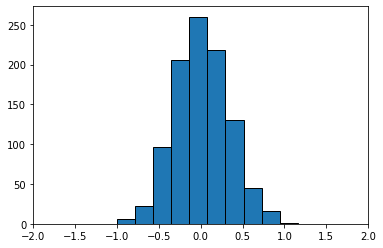

In [4]:
n_sim = 1000 # antall simuleringsforsøk vi skal gjøre

gjsnitt =  np.zeros(n_sim) # initialiserer vektor der hvert gjennomsnitt skal lagres

for i in range(n_sim):
    observasjoner = np.random.normal(mu, sigma, n);
    gjsnitt[i] = np.mean(observasjoner)  

plt.hist(gjsnitt, edgecolor='black')
plt.xlim(-2,2)
plt.show()

Fra histogrammet får vi et tydelig inntrykk av at estimatoren $\bar{X}$ er en normalfordelt størrelse med forventning $E(\bar{X}) = \mu = 0$. Det er denne egenskapen som gjør at vi sier at estimatoren $\bar{X}$ er *forventningsrett*. Standardavviket til estimatoren er $\tfrac{\sigma}{\sqrt{n}}$, som i dette tilfellet er $1/\sqrt{10} \approx 0.32$. 

Merk at usikkerheten i estimatoren avhenger av hvor mange observasjoner vi gjør! 

Dersom vi hadde sett på et tilfeldig utvalg bestående av $n = 100$ i stedet for $n = 10$ observasjoner ville vi fått en mindre varierende estimator for forventningsverdien $\mu$. Dette er illustrert i koden under.

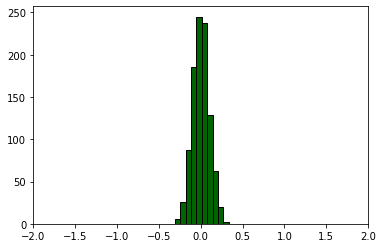

In [5]:
n_sim = 1000 # antall simuleringsforsøk vi skal gjøre

gjsnitt =  np.zeros(n_sim) # initialiserer vektor der hvert gjennomsnitt skal lagres

for i in range(n_sim):
    observasjoner = np.random.normal(mu, sigma, 100);  # OBS: nå 100 observasjoner
    gjsnitt[i] = np.mean(observasjoner)  
    
plt.hist(gjsnitt, edgecolor='black', color = 'darkgreen')
plt.xlim(-2,2)
plt.show()

## Konfidensintervall for forventningsverdien i normalfordelingen

Nå som vi vet at estimatet $\bar{x}$ for forventningsverdien $\mu$ er forbundet med usikkerhet, og at denne usikkerhet er direkte knyttet til både standardavviket til variablene $X_1$, $X_2$, ..., $X_n$ i det tilfeldige utvalget, samt antall observasjoner $n$, er det naturlig å bruke observasjonene vi gjør til å også si noe om denne usikkerheten. Vi skal dermed lage oss et *konfidensintervall*. I stedet for ett enkelt estimat ($\bar{x}$) for $\mu$ gir et konfidensintervall et estimat på et intervall som med stor sannsynlighet dekker parameterverdien $\mu$. 

### Kjent standardavvik
Dersom standardavviket $\sigma$ til hver variabel $X_i$ i utvalget er *kjent*, så finner vi et $(1-\alpha)\cdot 100 \%$ konfidensintervall ved 

$$\left[\bar{x} - z_{\alpha/2} \frac{\sigma}{\sqrt{n}}, \, \bar{x} + z_{\alpha/2} \frac{\sigma}{\sqrt{n}}\right]$$

der $z_{\alpha/2}$ er en kritisk verdi i standard normalfordelingen. 

Ofte regner vi ut et $95\%$ konfidensintervall ($z_{\alpha/2} = z_{0.025} \approx 1.960$) eller et $90\%$ konfidensintervall ($z_{\alpha/2} = z_{0.05} \approx 1.645$)

I koden under regner vi et ut et $95\%$ konfidensintervall (forkortet KI) basert på 10 observasjoner fra en standard normalfordeling. Ved å kjøre koden flere ganger kan du legge merke til hvordan intervallet endrer seg fra kjøring til kjøring! Grensene i intervallet inneholder jo estimatet $\bar{x}$ som vi vet at er en observasjon av en *stokastisk* variabel $\bar{X}$!

In [6]:
# Setter parameterverdier og utvalgstørrelse
mu = 0   # NB: vi later som om denne størrelsen er ukjent for oss!
sigma = 1
n = 10

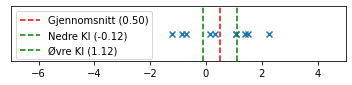

In [7]:
observasjoner = np.random.normal(mu, sigma, n)
plt.figure(figsize=(6,1))
plt.scatter(x = observasjoner, y = np.zeros(n), marker='x')
plt.yticks([])
plt.xlim([-7, 5])
mean_value = np.mean(observasjoner)
nedre_grense = np.mean(observasjoner) - stats.norm.ppf(1-0.025)*sigma/np.sqrt(n)
ovre_grense = np.mean(observasjoner) + stats.norm.ppf(1-0.025)*sigma/np.sqrt(n)
plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Gjennomsnitt ({mean_value:.2f})')
plt.axvline(x=nedre_grense, color='green', linestyle='--', label=f'Nedre KI ({nedre_grense:.2f})')
plt.axvline(x=ovre_grense, color='green', linestyle='--', label=f'Øvre KI ({ovre_grense:.2f})')
plt.legend()
plt.show()

Ved å kjøre koden over flere ganger, så vi at det observerte intervallet endret seg fra gang til gang, men veldig ofte dekket intervallet den faktiske parameterverdien $\mu$ som vi forsøker å estimere i dette eksempelet (intervallet inneholder den faktiske parameterverdien). Hvis vi nå setter opp en simulering der vi i hver iterasjon regner ut et $95\%$ konfidensintervall, finner vi at vi 'bommer' på parameterverdien $\mu$ noen få ganger. I lengden vil vi bomme akkurat $5\%$ av gangene. 

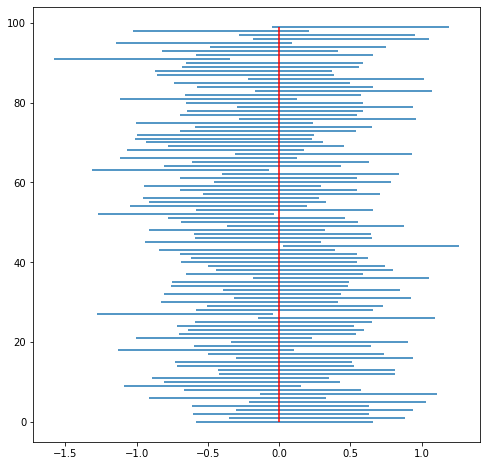

In [8]:
n_sim = 100 # antall simuleringsforsøk vi skal gjøre

gjsnitt =  np.zeros(n_sim) # initialiserer vektor der hvert gjennomsnitt skal lagres

for i in range(n_sim):
    observasjoner = np.random.normal(mu, sigma, 10);
    gjsnitt[i] = np.mean(observasjoner)  
    
    
nedre_grenser = gjsnitt - stats.norm.ppf(1-0.025)*sigma/np.sqrt(n)
ovre_grenser = gjsnitt + stats.norm.ppf(1-0.025)*sigma/np.sqrt(n)
    
plt.figure(figsize=(8,8))
plt.hlines(np.arange(n_sim),nedre_grenser,ovre_grenser) # horisontale linjer representerer 95% konfidensintervall for hver simulering
plt.vlines(mu,0,n_sim-1,'red')   # Rød vertikal stripe representerer "ukjent" størrelse mu
plt.show()

### Ukjent standardavvik
Dersom standardavviket $\sigma$ til hver variabel $X_i$ i utvalget er *ukjent*, så finner vi et $(1-\alpha)\cdot 100 \%$ konfidensintervall ved 

$$\left[\bar{x} - t_{\alpha/2, n-1} \frac{s}{\sqrt{n}}, \, \bar{x} + t_{\alpha/2, n-1} \frac{s}{\sqrt{n}}\right]$$

der $t_{\alpha/2, n-1}$ er en kritisk verdi i $t$-fordelingen med parameter $\nu = n-1$, og $s$ er estimert standardavvik $$s = \sqrt{\frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2}$$

Ofte regner vi ut et $95\%$ konfidensintervall ($z_{\alpha/2} = z_{0.025} \approx 1.960$) eller et $90\%$ konfidensintervall ($z_{\alpha/2} = z_{0.05} \approx 1.645$)

I koden under repeterer vi samme type simuleringsforsøk som tidligere, men nå later vi som om $\sigma$ også er ukjent. 

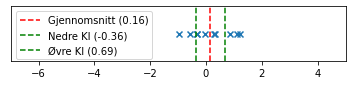

In [9]:
observasjoner = np.random.normal(mu, sigma, n)
plt.figure(figsize=(6,1))
plt.scatter(x = observasjoner, y = np.zeros(n), marker='x')
plt.yticks([])
plt.xlim([-7, 5])
mean_value = np.mean(observasjoner)
s = np.std(observasjoner, ddof = 1) # snarvei for å regne ut standardavvik
nedre_grense = np.mean(observasjoner) - stats.t.ppf(1-0.025,n-1)*s/np.sqrt(n)
ovre_grense = np.mean(observasjoner) + stats.t.ppf(1-0.025,n-1)*s/np.sqrt(n)
plt.axvline(x=mean_value, color='red', linestyle='--', label=f'Gjennomsnitt ({mean_value:.2f})')
plt.axvline(x=nedre_grense, color='green', linestyle='--', label=f'Nedre KI ({nedre_grense:.2f})')
plt.axvline(x=ovre_grense, color='green', linestyle='--', label=f'Øvre KI ({ovre_grense:.2f})')
plt.legend()
plt.show()

## Bredden på intervallet

### Eksempel
En kjemistudent har fått i oppgave å estimere konsentrasjonen av koffein i Coca Cola. Han undersøker $n$ prøver, hver med nøyaktig 1.0 dl Coca Cola, og for hver prøve måler han antall mg koffein i prøven.

La $X_i$ betegne målt koffeininnhold, i mg, for prøve nr. $i = 1, 2, \ldots, n$. 
Anta at $X_1,\ldots, X_n$ er uavhengige og normalfordelte med (ukjent) forventning $\mu$ og standardavvik $\sigma$. Forventningsverdien $\mu$ representerer her det sanne koffein-innholdet i hver Coca Cola-prøve, mens standardavviket $\sigma$ representerer unøyaktigheten i målemetoden til studenten.

In [10]:
# Tall vi vil bruke for å regne estimat og konfidensintervall for eksempelet

n=12  # antall målinger
xbar=9.2  # gjennomsnitt av målingene
sigma=0.14 # det kjente standardavviket
alpha=0.05 # (1-\alpha)*100% konfidensintervall
zalphahalve=stats.norm.ppf(1-alpha/2) # kritisk verdi i standard normalfordeling 

In [11]:
# konfidensintervall:

nedre_grense = xbar - zalphahalve*sigma/np.sqrt(n)
ovre_grense =  xbar + zalphahalve*sigma/np.sqrt(n)

print([nedre_grense, ovre_grense])

[9.120788998614668, 9.279211001385331]


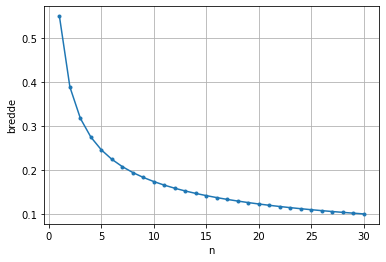

In [12]:
# bredden på intervallet

def breddefunc(n):
  return(2*zalphahalve*sigma/np.sqrt(n))

nverdier=np.arange(1,31)

plt.plot(nverdier, breddefunc(nverdier), '.-')
plt.xlabel('n')
plt.ylabel('bredde')
plt.grid()
plt.show()

La oss si at vi er ute etter et antall målinger $n$ slik at bredden på intervallet ikke overskrider 0.12. Se på figuren over: er det 20 eller 21 som gir bredde på 0.12? Undersøker vi litt nærmere ser vi at vi må velge $n=21$ for å være sikret bredde som ikke overskrider 0.12.

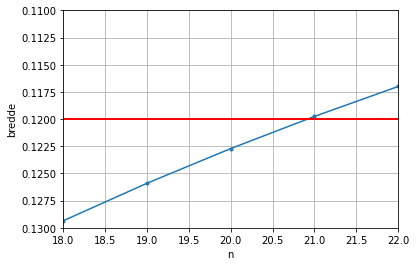

In [13]:
plt.plot(nverdier, breddefunc(nverdier), '.-')
plt.xlim(18,22)
plt.ylim(0.13,0.11)
plt.xlabel('n')
plt.ylabel('bredde')
plt.hlines(y=0.12, xmin=18, xmax=22, linewidth=2, color='r')
plt.grid()
plt.show()